In [25]:
import numpy as np
import sqlite3 as sq
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import json
import matplotlib.text as mtext

from colors import Colors

%matplotlib inline

In [26]:
def toMilliseconds(val):
    return val.div(1000000)

def calculateCDF(items):
    count, bins_count = np.histogram(items, bins="auto")

    pdf = count / sum(count)

    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    return bins_count[1:], cdf

In [28]:
labMedian = 23.4

In [27]:
tcp_durations = pd.read_csv("lab_results/tcp_durations.csv", names = ["duration"])
tls_durations = pd.read_csv("lab_results/tls_durations.csv", names = ["duration"])
quic_durations = pd.read_csv("lab_results/quic_durations.csv", names = ["duration"])

In [58]:
tcp_durations = tcp_durations[toMilliseconds(tcp_durations["duration"]) < 60]

In [68]:
toMilliseconds(tcp_durations["duration"]).median()

23.399495

In [60]:
toMilliseconds(tcp_durations["duration"]).var()/toMilliseconds(tcp_durations["duration"]).mean()

0.022139413103066306

In [61]:
toMilliseconds(tls_durations["duration"]).median()

48.477125

In [62]:
toMilliseconds(tls_durations["duration"]).var()/toMilliseconds(tls_durations["duration"]).mean()

0.02690865873423687

In [69]:
toMilliseconds(quic_durations["duration"]).median()

1.1334187820512822

In [64]:
toMilliseconds(quic_durations["duration"]).var()/toMilliseconds(quic_durations["duration"]).mean()

0.06007739419009259

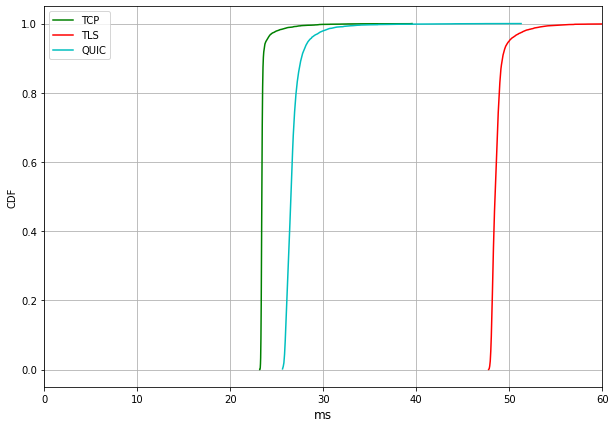

In [65]:
cdfTCP = calculateCDF(toMilliseconds(tcp_durations["duration"]).tolist())
cdfTLS = calculateCDF(toMilliseconds(tls_durations["duration"]).tolist())
cdfQUIC = calculateCDF(toMilliseconds(quic_durations["duration"]).tolist())

fig = plt.figure(figsize = (10, 7))
plt.plot(cdfTCP[0], cdfTCP[1], label="TCP", color = Colors.tcp)
plt.plot(cdfTLS[0], cdfTLS[1], label="TLS", color = Colors.tls)
plt.plot(cdfQUIC[0], cdfQUIC[1], label="QUIC", color = Colors.quic)
plt.xlim([0, 60])

plt.xlabel("ms", fontsize = 12)
plt.ylabel("CDF")

plt.legend()
plt.grid()

plt.savefig("figures/lab_experiment_cdf.pdf", bbox_inches='tight')
plt.show()

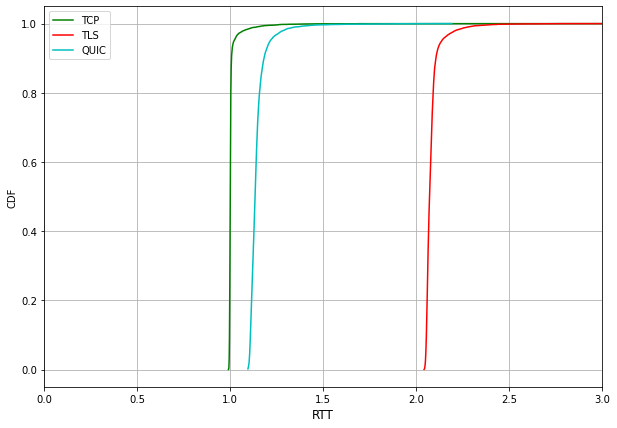

In [43]:
cdfTCP = calculateCDF(toMilliseconds(tcp_durations["duration"]).div(labMedian).tolist())
cdfTLS = calculateCDF(toMilliseconds(tls_durations["duration"]).div(labMedian).tolist())
cdfQUIC = calculateCDF(toMilliseconds(quic_durations["duration"]).div(labMedian).tolist())

fig = plt.figure(figsize = (10, 7))
plt.plot(cdfTCP[0], cdfTCP[1], label="TCP", color = Colors.tcp)
plt.plot(cdfTLS[0], cdfTLS[1], label="TLS", color = Colors.tls)
plt.plot(cdfQUIC[0], cdfQUIC[1], label="QUIC", color = Colors.quic)
plt.xlim([0, 3])

plt.xlabel("RTT", fontsize = 12)
plt.ylabel("CDF")

plt.legend()
plt.grid()

plt.savefig("figures/lab_experiment_rtt_cdf.pdf", bbox_inches='tight')
plt.show()